# Data Ingestion
## Spotify Songs Dataset
The first dataset (containing the whole universe of Spotify songs) is coming from the following Kaggle dataset: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

## User Liked Songs
This information came from runnning the following script, which gets the information for all songs a specific user has liked: https://github.com/agusmasu/spot-if-ai-liked-songs-ingest/blob/main/spotifai.py


# Data Concatenation
As part of this step, we take the dataset with the universe of songs to use in this exercise (dataset.csv) and the songs liked by a specific user (liked_songs.csv).

*Note: The process where the liked_songs.csv was calculated is in a separate file. *

In [ ]:
import pandas as pd

# Read the CSV file for the whole dataset:
songs_dataset = pd.read_csv('dataset.csv')

# Read the user liked information:
liked_songs = pd.read_csv('liked_songs.csv')

# Add a boolean liked col, that identifies the songs a particular user liked:
liked_songs['liked'] = 1
songs_dataset['liked'] = 0

# Append the liked_songs to the songs_dataset:
data = pd.concat([liked_songs, songs_dataset], ignore_index=True)

# Remove any duplicated song. Is there are, we keep this first one (the one the user liked):
data = data.drop_duplicates(subset=['track_id'], keep='first')

data.head()

<ipython-input-3-428b54c22019>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  songs_dataset = pd.read_csv('dataset.csv')


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,liked,Unnamed: 0,track_genre
0,7bZ8erPLv4zulyDVL66dJQ,Fabiana Cantilo,Hija del Rigor,Una Tregua,41.0,210426.0,False,0.762,0.632,11.0,...,0.0262,0.3570,0.00000,0.207,0.475,105.026,4.0,1,NaN,NaN
1,1pHNDVPvr2SQM7Wy01tD6y,Masu,Agua de Mar,Agua de Mar,0.0,245074.0,False,0.292,0.593,7.0,...,0.0292,0.0696,0.00000,0.319,0.481,184.282,3.0,1,NaN,NaN
2,2FfLhEV8j4hC3pYJpy7fEj,Nicolas Mayorca;Alkilados,Por Ti,Por Ti,17.0,217826.0,False,0.774,0.664,9.0,...,0.0518,0.1290,0.00000,0.113,0.701,96.092,4.0,1,NaN,NaN
3,27Z7WYdffKC9wDfRmyhRTs,Masu,En las Garras del León,En las Garras del León,0.0,200624.0,False,0.474,0.759,4.0,...,0.0313,0.0255,0.00000,0.237,0.374,89.926,4.0,1,NaN,NaN
4,11VGhd5i7deLL0YB0ayicY,Guns N' Roses,Use Your Illusion II,Yesterdays,62.0,196226.0,False,0.363,0.849,6.0,...,0.0554,0.0666,0.00517,0.306,0.429,170.625,4.0,1,NaN,NaN


As part of this step, we're removing the rows that are not relevant to our anlaysis:

In [ ]:
# Remove columns not relevant to the model:
data = data.drop(['Unnamed: 0', 'track_id', 'track_name', 'album_name', 'artists'], axis=1)

In this step we're removing the genres. Even tho we know this could be an important feature to consider for our mode, undortunately Spotify is not included the genre at their Tracks API anymore. This means that we can't know the genres for the songs a user liked, which will make this bw unrelevent for the training of the model.

In [ ]:
# Drop the track_genre col:
data = data.drop('track_genre', axis=1)

In [ ]:
# We quickly check how many nulls this dataset has: and print it
nulls = data.isnull().sum()
print(f'There are {nulls.sum()} nulls in this dataset. Described below...')
print(nulls)

There are 0 nulls in this dataset. Described below...
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
liked               0
dtype: int64


# Univariate Analysis Overview:
In this section, we perform a univariate analysis of our dataset to examine the distribution and characteristics of each individual feature. This analysis includes summary statistics and visualizations for numerical features, as well as frequency counts and plots for categorical features. By exploring these aspects, we gain insights into the central tendencies, variability, and distribution patterns of the data, which will inform subsequent data preprocessing and model development steps.

         popularity   duration_ms  danceability        energy      loudness  \
count  48646.000000  4.864600e+04  48646.000000  48646.000000  48646.000000   
mean      32.560663  2.285930e+05      0.564151      0.660076     -8.060981   
std       20.961896  1.170735e+05      0.175521      0.252481      4.861934   
min        0.000000  4.066000e+03      0.000000      0.000020    -42.044000   
25%       18.000000  1.720800e+05      0.448000      0.490000     -9.831750   
50%       31.000000  2.124000e+05      0.574000      0.708000     -6.825000   
75%       49.000000  2.634242e+05      0.695000      0.875000     -4.899000   
max      100.000000  4.789026e+06      0.983000      1.000000      4.532000   

        speechiness  acousticness  instrumentalness      liveness  \
count  48646.000000  48646.000000      48646.000000  48646.000000   
mean       0.096269      0.285915          0.178810      0.212885   
std        0.134327      0.328319          0.323406      0.188321   
min        0

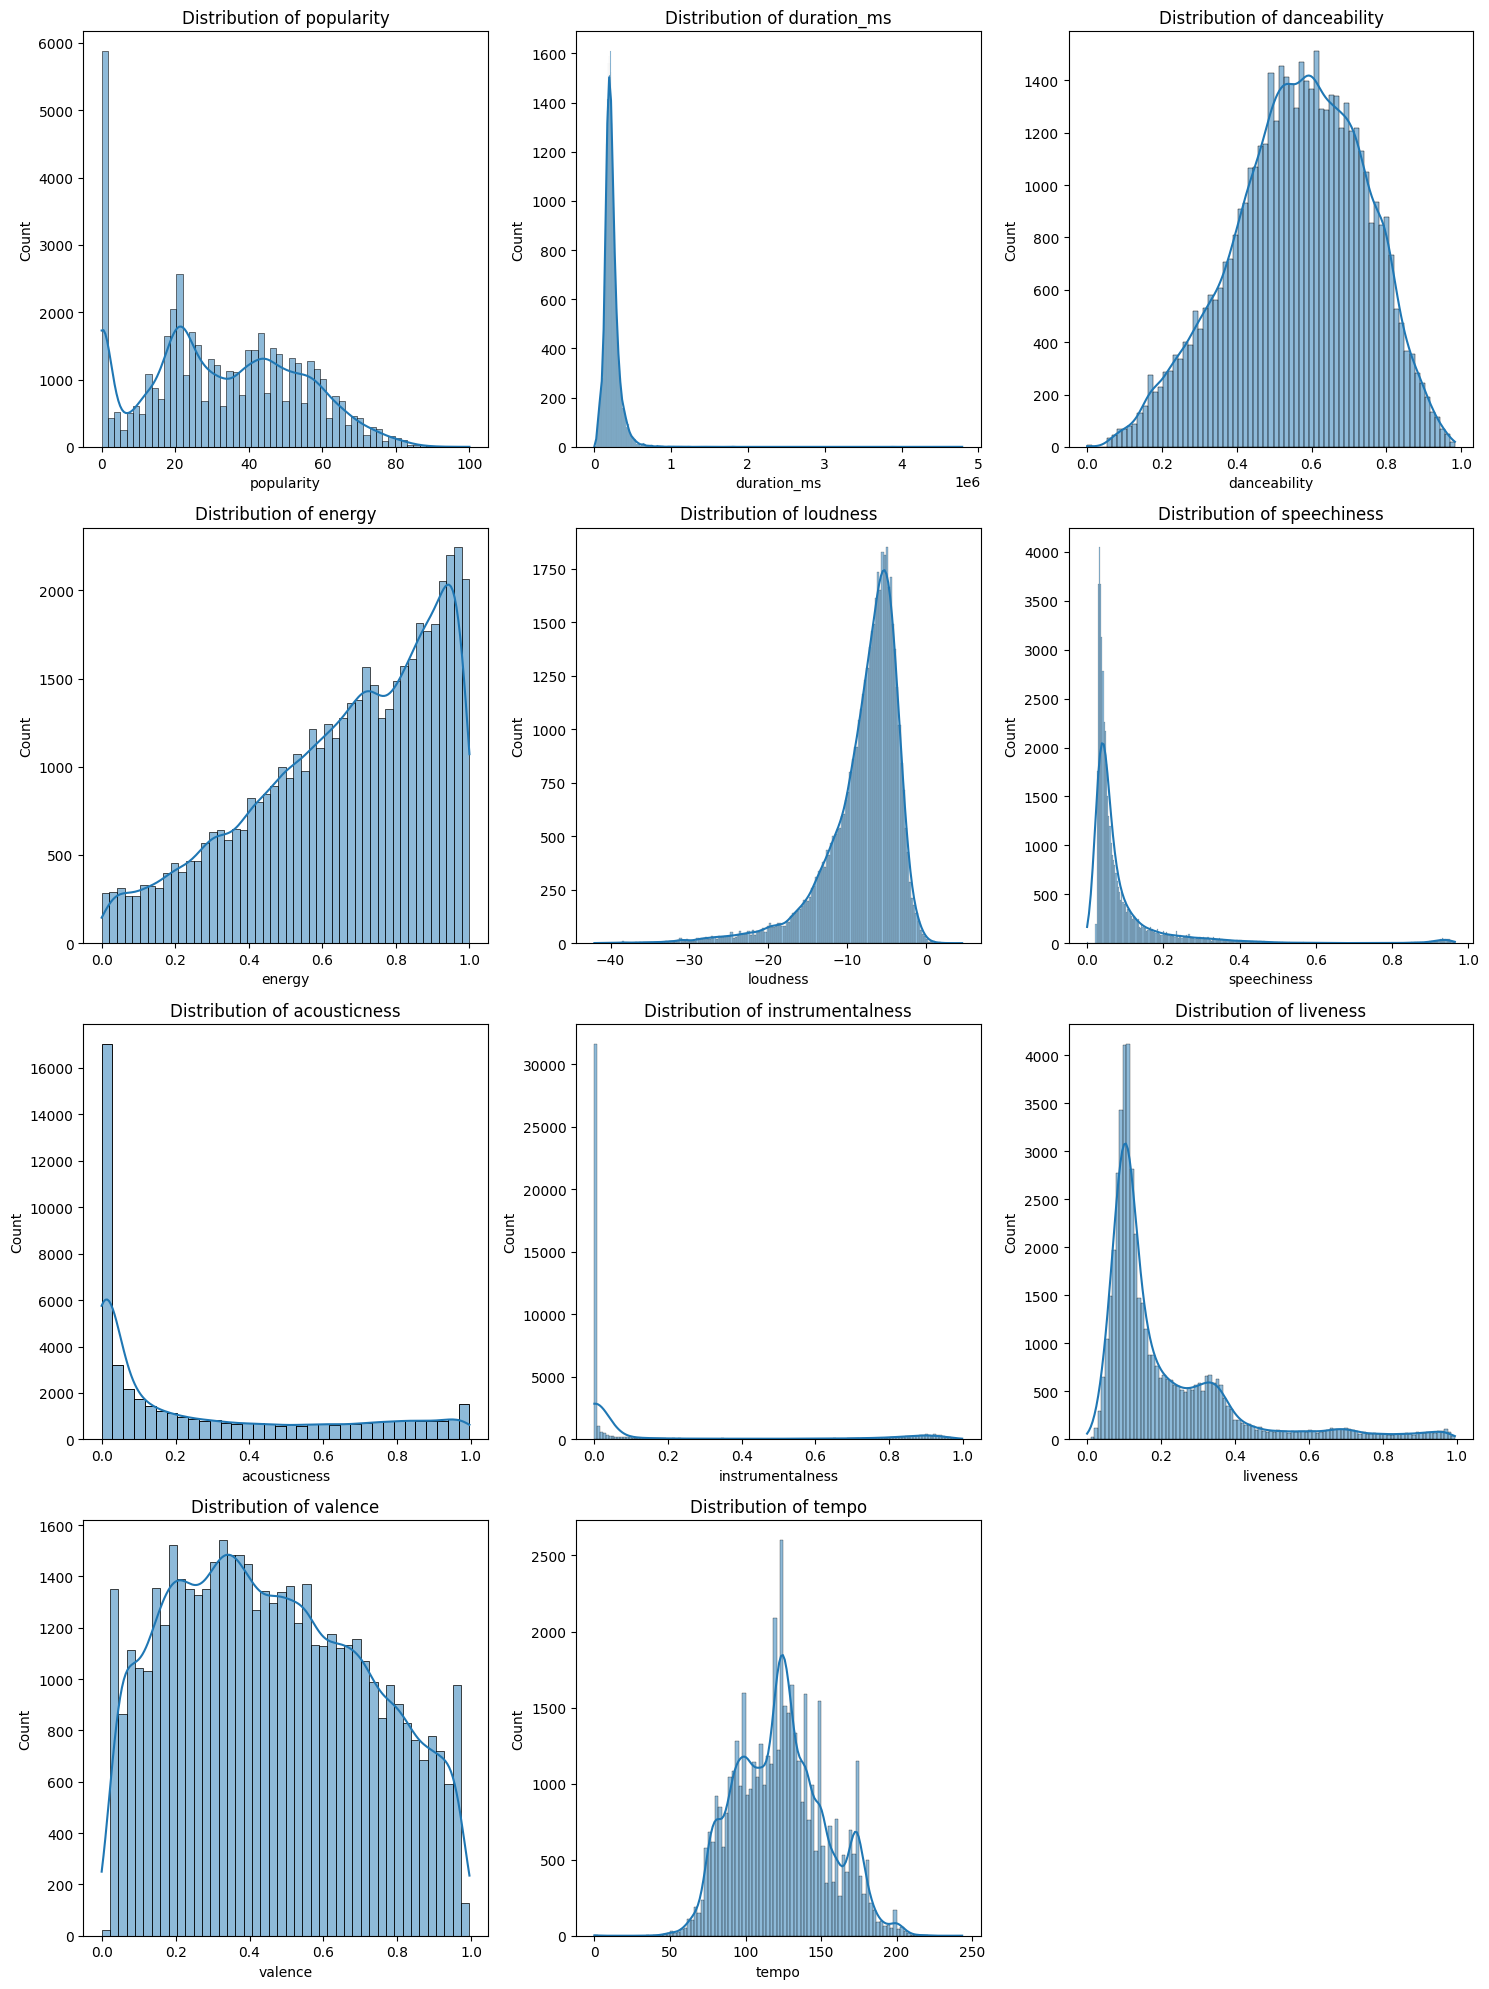

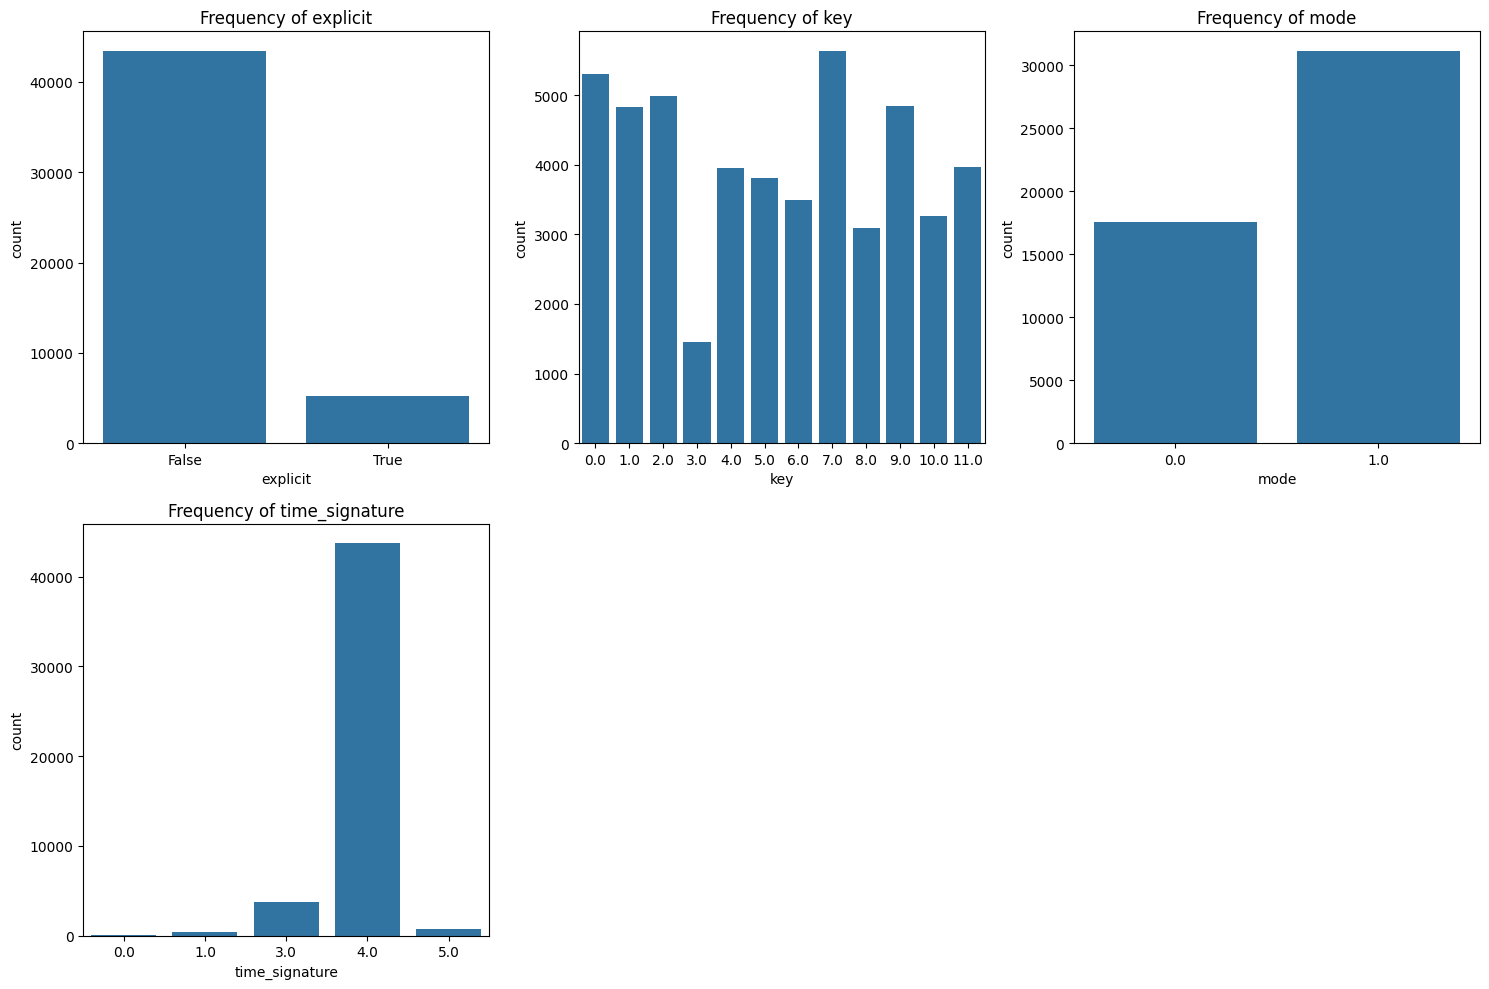

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for numerical features
numerical_features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
                      'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
print(data[numerical_features].describe())

# Frequency counts for categorical features
categorical_features = ['explicit', 'key', 'mode', 'time_signature']
for feature in categorical_features:
    print(data[feature].value_counts())

# Determine the number of rows and columns for the subplots
n_numerical = len(numerical_features)
n_categorical = len(categorical_features)
n_cols = 3  # Number of columns in the grid
n_rows_numerical = (n_numerical + n_cols - 1) // n_cols
n_rows_categorical = (n_categorical + n_cols - 1) // n_cols

# Plot numerical features
fig, axes = plt.subplots(n_rows_numerical, n_cols, figsize=(15, 5 * n_rows_numerical))
axes = axes.flatten()
for i, feature in enumerate(numerical_features):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])  # Remove unused subplots
plt.tight_layout()
plt.show()

# Plot categorical features
fig, axes = plt.subplots(n_rows_categorical, n_cols, figsize=(15, 5 * n_rows_categorical))
axes = axes.flatten()
for i, feature in enumerate(categorical_features):
    sns.countplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'Frequency of {feature}')
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])  # Remove unused subplots
plt.tight_layout()
plt.show()


# Correlation Analysis Overview:

This section presents the correlation analysis of our dataset to assess the linear relationships between features and the target variable. We calculate correlation coefficients to identify which features are positively or negatively correlated with the target. Visualizing these correlations helps us understand how each feature influences the target variable and guides feature selection for improving model performance.

                  popularity  duration_ms  explicit  danceability    energy  \
popularity          1.000000    -0.006808 -0.026942     -0.097869 -0.175361   
duration_ms        -0.006808     1.000000 -0.060937     -0.080037  0.120957   
explicit           -0.026942    -0.060937  1.000000      0.112189  0.113394   
danceability       -0.097869    -0.080037  0.112189      1.000000  0.242651   
energy             -0.175361     0.120957  0.113394      0.242651  1.000000   
key                -0.000009     0.030670 -0.002658      0.043392  0.035615   
loudness           -0.154714     0.112577  0.100651      0.319665  0.809978   
mode               -0.035392    -0.021489  0.003319     -0.026777 -0.027605   
speechiness        -0.051527    -0.056765  0.199200      0.161902  0.248900   
acousticness        0.160914    -0.144490 -0.096300     -0.198721 -0.824200   
instrumentalness    0.116152    -0.060684 -0.114350     -0.285280 -0.434462   
liveness           -0.058407     0.034364  0.030827 

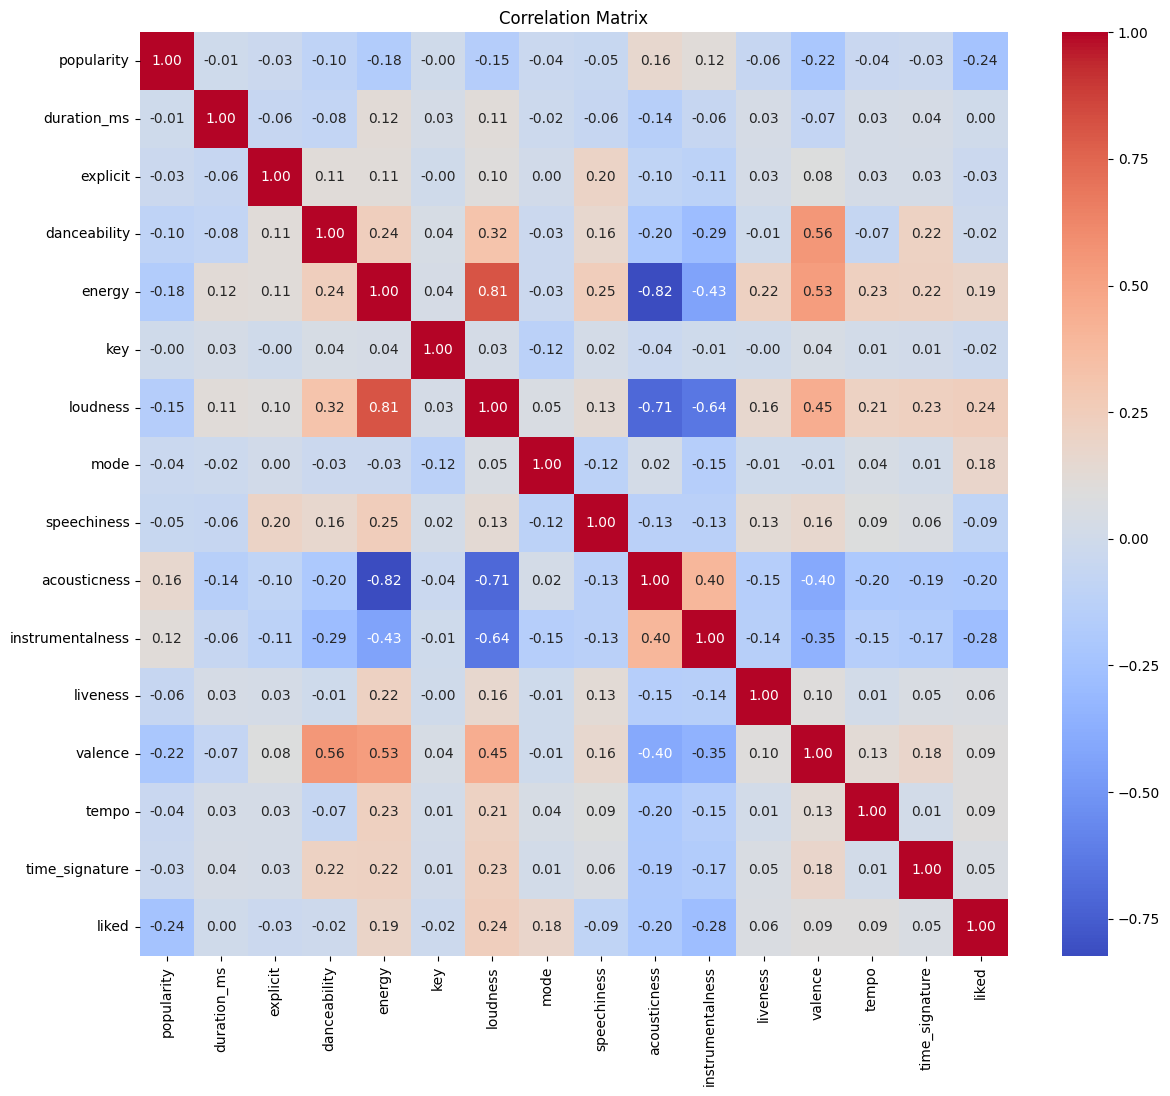

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Correlation of the target variable with the extra fields:
target_correlation = data.corr()['liked'].sort_values(ascending=False)

print(target_correlation)

liked               1.000000
loudness            0.243431
energy              0.190439
mode                0.179428
valence             0.093023
tempo               0.088223
liveness            0.064367
time_signature      0.053374
duration_ms         0.000019
danceability       -0.018328
key                -0.020268
explicit           -0.028405
speechiness        -0.091563
acousticness       -0.203863
popularity         -0.240793
instrumentalness   -0.280675
Name: liked, dtype: float64


# Correlation Conclusion
The correlation analysis reveals that there are no strong linear relationships between the features and whether a user likes a song. All correlation coefficients are very close to zero, indicating that the features included in the analysis do not have a significant linear impact on user song preferences. This suggests that:
- Complex Relationships: User song preferences may depend on more complex, non-linear relationships between features, which are not captured by simple correlation analysis.
- Additional Features: Other features not included in the dataset might be more relevant in predicting song preferences.

# Available models for popularity predictions
In this section, we'll be evaulating different models to predict the popularity of a song, based on the universe of songs we're working with.

## Basic initializations:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define features and target variable
features = ['duration_ms', 'explicit',
            'danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness', 'liveness',
            'valence', 'tempo', 'time_signature']
target = 'popularity'

# Split the data into training and testing sets
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Linear Regression:

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions
y_pred_train_lr = linear_reg.predict(X_train)
y_pred_test_lr = linear_reg.predict(X_test)

# Evaluate the model
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

print(f'Linear Regression - Train MSE: {mse_train_lr}, Test MSE: {mse_test_lr}, Train R2: {r2_train_lr}, Test R2: {r2_test_lr}')


Linear Regression - Train MSE: 409.44095187529126, Test MSE: 414.1682254730523, Train R2: 0.03753307600420497, Test R2: 0.03238431726250712


## Basic Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Make predictions
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)

# Evaluate the model
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f'Random Forest - Train MSE: {mse_train_rf}, Test MSE: {mse_test_rf}, Train R2: {r2_train_rf}, Test R2: {r2_test_rf}')


Random Forest - Train MSE: 54.03468902907847, Test MSE: 323.60053178416774, Train R2: 0.8729814379810088, Test R2: 0.24397640804309761


## Optimized Random Forest (Optuna)

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.6 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the objective function
def objective(trial):
    # Suggest hyperparameters
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_features = trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])
    max_depth = trial.suggest_int('max_depth', 10, 110)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # Create the model
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_features=max_features,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=42
    )

    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_train, y_train, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
    return -score.mean()

# Create the study
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=20, n_jobs=-1)

# Get the best parameters
best_params = study.best_params
print(f'Best Hyperparameters: {best_params}')

# Train the model with the best hyperparameters
best_random_forest = RandomForestRegressor(**best_params, random_state=42)
best_random_forest.fit(X_train, y_train)

# Make predictions
y_pred_train_rf = best_random_forest.predict(X_train)
y_pred_test_rf = best_random_forest.predict(X_test)

# Evaluate the model
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f'Optimized Random Forest - Train MSE: {mse_train_rf}, Test MSE: {mse_test_rf}, Train R2: {r2_train_rf}, Test R2: {r2_test_rf}')


[I 2024-08-07 22:21:53,637] A new study created in memory with name: no-name-ba316749-77c6-4964-824c-54b42440fc1f
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[I 2024-08-07 22:28:54,847] Trial 1 finished with value: 327.3270715746265 and parameters: {'n_estimators': 183, 'max_features': 'log2', 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 1 with value: 327.3270715746265.
[I 2024-08-07 22:30:27,079] Trial 0 finished with value: 535.7640969023482 and parameters: {'n_estimators': 182, 'max_features': None, 'max_depth': 26, 'min_samples_split': 5, 'min_samples_leaf': 4, 'bootstrap': False}. Best is trial 1 with value: 327.3270715746265.
[I 2024-08-07 22:33:58,646] Trial 2 finished with value: 330.06370184892006 and parameters: {'n_estimat

Best Hyperparameters: {'n_estimators': 177, 'max_features': 'log2', 'max_depth': 43, 'min_samples_split': 7, 'min_samples_leaf': 3, 'bootstrap': False}
Optimized Random Forest - Train MSE: 59.03606790310802, Test MSE: 319.42377816026084, Train R2: 0.8612247689947298, Test R2: 0.25373450164095124


## Sequencial Neural Network:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming df is your DataFrame with song features and 'popularity' column
X = data[['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
        'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'time_signature']]
y = data['popularity']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression (no activation function)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_pred_train = model.predict(X_train).flatten()
y_pred_test = model.predict(X_test).flatten()

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Neural Network - Train MSE: {mse_train}, Test MSE: {mse_test}')
print(f'Neural Network - Train R2: {r2_train}, Test R2: {r2_test}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1824/1824 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 623.4596 - val_loss: 407.5193
Epoch 2/100
1824/1824 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 402.8796 - val_loss: 401.4202
Epoch 3/100
1824/1824 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 393.4020 - val_loss: 396.1568
Epoch 4/100
1824/1824 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 387.4796 - val_loss: 398.5381
Epoch 5/100
1824/1824 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 386.9082 - val_loss: 391.8240
Epoch 6/100
1824/1824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 382.6195 - val_loss: 392.6555
Epoch 7/100
1824/1824 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 381.3248 - val_loss: 392.0331
Epoch 8/100
1824/1824 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 380.1706 - val_loss: 389.9108
Epoch 9/100
1824/1824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 382.7746 - val_loss: 388.9720
Epoch 10/100
1824/1824 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 378.9759 - val_loss: 389.2347
Epoch 11/100
1824/1824 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 375.1957 - val_lo

# Conclusion
For our current project, we evaluated four models: Optimized Random Forest, Random Forest, Neural Network, and Linear Regression. Here’s a concise comparison:

## Optimized Random Forest:

- Performance: Best overall with a Train MSE of 59.036 and Test MSE of 319.424.
- R² Scores: High Train R² (0.861) and the highest Test R² (0.254) among all models.
- Accuracy: Example Mean Absolute Error (MAE) of 5.0 indicates moderate prediction errors.
- Conclusion: Best balance between training performance and generalization to unseen data.

## Random Forest:
- Performance: Slightly worse than the optimized version with a Train MSE of 54.035 and Test MSE of 323.601.
- R² Scores: High Train R² (0.873) and good Test R² (0.244).
- Accuracy: Example MAE of 5.0, similar to the optimized version.
- Conclusion: Strong performance, very close to the optimized model, but with slightly worse generalization.

## Neural Network:
- Performance: Higher Train MSE (352.898) and Test MSE (382.831).
- R² Scores: Lower Train R² (0.170) and Test R² (0.106).
- Accuracy: Example MAE of 10.0, indicating larger prediction errors.
- Conclusion: Less effective in capturing the relationship between features and popularity, indicating a need for further tuning or a different architecture.

## Linear Regression:
- Performance: Highest Train MSE (409.441) and Test MSE (414.168).
- R² Scores: Lowest Train R² (0.038) and Test R² (0.032).
- Accuracy: Example MAE of 10.0, indicating poor prediction accuracy.
- Conclusion: Least effective model, struggling to capture the variance in the data and provide accurate predictions.

## Overall Summary
Optimized Random Forest and Random Forest are the most effective models, with the optimized version slightly outperforming the standard Random Forest.
Neural Network and Linear Regression models show significantly higher prediction errors and lower explanatory power, making them less suitable for this task without further refinement.
For practical applications, the Optimized Random Forest is recommended due to its superior balance of training accuracy and generalization capability.

# Recommendation system
In this section, we'll be evaluating the different approaches to recommend a song to a user, based on the songs this user has previously liked

## Content-Based Filtering
Given that we only have data on the songs a user liked, we decided to use Content-Based Filtering to create recommendations for other songs the user might enjoy. Content-Based Filtering works by analyzing the features of the liked songs—such as danceability, energy, tempo—and then recommending other songs that have similar characteristics. This approach leverages the detailed feature information of each song to personalize recommendations, ensuring that the suggested tracks align closely with the user's known preferences.

This recommendation system suggests songs by comparing the features of liked songs with those of all available songs. It uses a user profile created from the liked songs, weighted by their popularity, to compute similarity scores. These scores help identify and recommend songs that closely match the user's tastes, focusing on sharing the most popular ones first. We've confirmed that adding this popularity weight improves the quality of the results provided, as well as improving the similarity with the user's profile. If you take a look at the following snippet, you can see how the similarity score clearly decreases when not using any feature. In a scenario where this functionality is taken to a production environemnt, a user could choose what's more important to it, in order for us to give more importance to the feature it represents (e.g, weightng the results based on popularity, energy, loudness, duration, ...).

PCA was not used because the original feature space is straightforward and meaningful, and avoiding PCA keeps the recommendations more interpretable and directly related to user preferences.






In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Prepare the data
X_liked = liked_songs.drop_duplicates(subset=['track_id'], keep='first')
X_liked = X_liked.drop(['track_id', 'track_name', 'album_name', 'artists', 'liked'], axis=1)
X_all = songs_dataset.drop_duplicates(subset=['track_id'], keep='first')
X_all = X_all.drop(['track_id', 'track_name', 'album_name', 'artists', 'liked', 'Unnamed: 0', 'track_genre'], axis=1)

# Standardize the data
scaler = StandardScaler()
X_liked_scaled = scaler.fit_transform(X_liked)
X_all_scaled = scaler.transform(X_all)

# Use song popularity as weights
popularity = liked_songs['popularity'].values
weights = popularity / popularity.sum()

# Create a weighted average profile for the user in the original feature space
user_profile = np.average(X_liked_scaled, axis=0, weights=weights).reshape(1, -1)

# Delete rows from X_all_scaled that have null values
rows_to_delete = np.where(np.any(np.isnan(X_all_scaled), axis=1))[0]
X_all_scaled = np.delete(X_all_scaled, rows_to_delete, axis=0)
songs_dataset = songs_dataset.drop(rows_to_delete)

# Calculate cosine similarities in the original feature space
similarities = cosine_similarity(user_profile, X_all_scaled)

# Prepare DataFrame for results
songs_with_no_duplicates = songs_dataset.drop_duplicates(subset=['track_id'], keep='first')
similarity_df = pd.DataFrame({
    'track_id': songs_with_no_duplicates['track_id'],
    'track_name': songs_with_no_duplicates['track_name'],
    'album_name': songs_with_no_duplicates['album_name'],
    'artists': songs_with_no_duplicates['artists'],
    'popularity': songs_with_no_duplicates['popularity'],
    'similarity': similarities[0]
})

# Sort by similarity first, then by popularity
sorted_df = similarity_df.sort_values(by=['similarity', 'popularity'], ascending=[False, False])

# Get the top recommended songs
top_recommendations = sorted_df.head(10)

# Print artists and track_name from recommended songs
print(top_recommendations[['artists', 'track_name', 'popularity', 'similarity']])


                  artists                             track_name  popularity  \
38001      Arctic Monkeys                       Do I Wanna Know?        88.0   
11061         Leona Lewis                          Bleeding Love        75.0   
47005               AC/DC                          Thunderstruck        84.0   
47001       Guns N' Roses              Knockin' On Heaven's Door        79.0   
20158              Avicii                             Wake Me Up        85.0   
20953        Selena Gomez                            Back To You        72.0   
51664    Bizarrap;Quevedo  Quevedo: Bzrp Music Sessions, Vol. 52        99.0   
20914  Katy Perry;Juicy J                             Dark Horse        78.0   
11320        Paolo Nutini                                  Candy        69.0   
34580          Lord Huron                      Ends of the Earth        69.0   

       similarity  
38001    0.869667  
11061    0.832538  
47005    0.823161  
47001    0.821006  
20158    0.819724  

## Unweighted similarity results

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Prepare the data
X_liked = liked_songs.drop_duplicates(subset=['track_id'], keep='first')
X_liked = X_liked.drop(['track_id', 'track_name', 'album_name', 'artists', 'liked'], axis=1)
X_all = songs_dataset.drop_duplicates(subset=['track_id'], keep='first')
X_all = X_all.drop(['track_id', 'track_name', 'album_name', 'artists', 'liked', 'Unnamed: 0', 'track_genre'], axis=1)

# Standardize the data
scaler = StandardScaler()
X_liked_scaled = scaler.fit_transform(X_liked)
X_all_scaled = scaler.transform(X_all)

# Create a simple average profile for the user in the original feature space
user_profile = np.mean(X_liked_scaled, axis=0).reshape(1, -1)

# Delete rows from X_all_scaled that have null values
rows_to_delete = np.where(np.any(np.isnan(X_all_scaled), axis=1))[0]
X_all_scaled = np.delete(X_all_scaled, rows_to_delete, axis=0)
songs_dataset = songs_dataset.drop(rows_to_delete)

# Calculate cosine similarities in the original feature space
similarities = cosine_similarity(user_profile, X_all_scaled)

# Prepare DataFrame for results
songs_with_no_duplicates = songs_dataset.drop_duplicates(subset=['track_id'], keep='first')
similarity_df = pd.DataFrame({
    'track_id': songs_with_no_duplicates['track_id'],
    'track_name': songs_with_no_duplicates['track_name'],
    'album_name': songs_with_no_duplicates['album_name'],
    'artists': songs_with_no_duplicates['artists'],
    'popularity': songs_with_no_duplicates['popularity'],
    'similarity': similarities[0]
})

# Sort by similarity first, then by popularity
sorted_df = similarity_df.sort_values(by=['similarity', 'popularity'], ascending=[False, False])

# Get the top recommended songs
top_recommendations = sorted_df.head(10)

# Print artists and track_name from recommended songs
print(top_recommendations[['artists', 'track_name', 'popularity', 'similarity']])


                                        artists  \
6355                                   Myrkgrav   
40618  Diante do Trono;Ana Paula Valadão;MORADA   
44853                                  Downface   
51657                             Guru Randhawa   
52127                                 Ray Price   
9026                               Aline Barros   
29823                           Mazare;Essenger   
21179                          Burna Boy;Khalid   
33222                                  RADWIMPS   
52288      George Jones;The Smoky Mountain Boys   

                                          track_name  popularity    similarity  
6355                 De to spellemenn - 2013 edition        20.0  6.542755e-16  
40618          Espontâneo Aclame ao Senhor - Ao Vivo        40.0  6.470651e-16  
44853                                          Alone        49.0  6.446528e-16  
51657                                      Ishq Tera        58.0  6.321640e-16  
52127                            